# Problem 1

## Task 1

In [95]:
import data_collection_311

import numpy as np
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
from sodapy import Socrata

from census import Census
from us import states

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [96]:
full_df = data_collection_311.load_full_data()

## Task 2 and 3

Text(0.5,1,'Service Request Frequency by Month and Type')

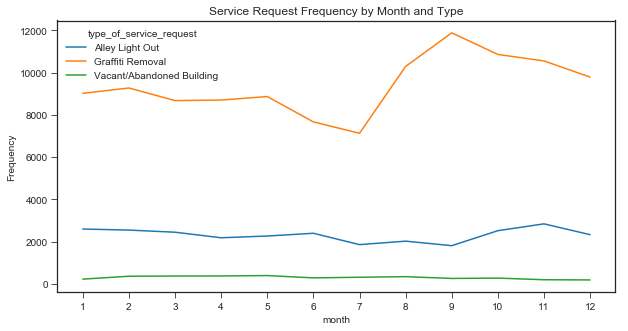

In [97]:
# Request volume by type over time
over_time = data_collection_311.summary_statistics(full_df, 'type_of_service_request', 'month', np.sum)
over_time

sns.set_style('ticks')
plot = over_time.plot(figsize=(10,5))
plot.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.ylabel('Frequency')
plt.title('Service Request Frequency by Month and Type')

### Task 3 Obervations

We can observe that there is some seasonal variation in request volume, particularly for Alley Light Out and Graffiti Removal. 

Graffiti Removal requests in particular see a volume spike beginning in July that peaks in September before beginning to drop. We can surmise that this increase is due to the warm-weather months and tracks with the increased crime rate typically seen in Chicago in the summer. 

The warm weather months seem to have the opposite effect on Alley Light Out requests. These requests have particularly low volume between July and September, with requests increasing at the end of the year. One possible reason for this effect is long summer days reducing the need for outdoor lighting in the summer, and shortening fall days increasing the need for lighting.

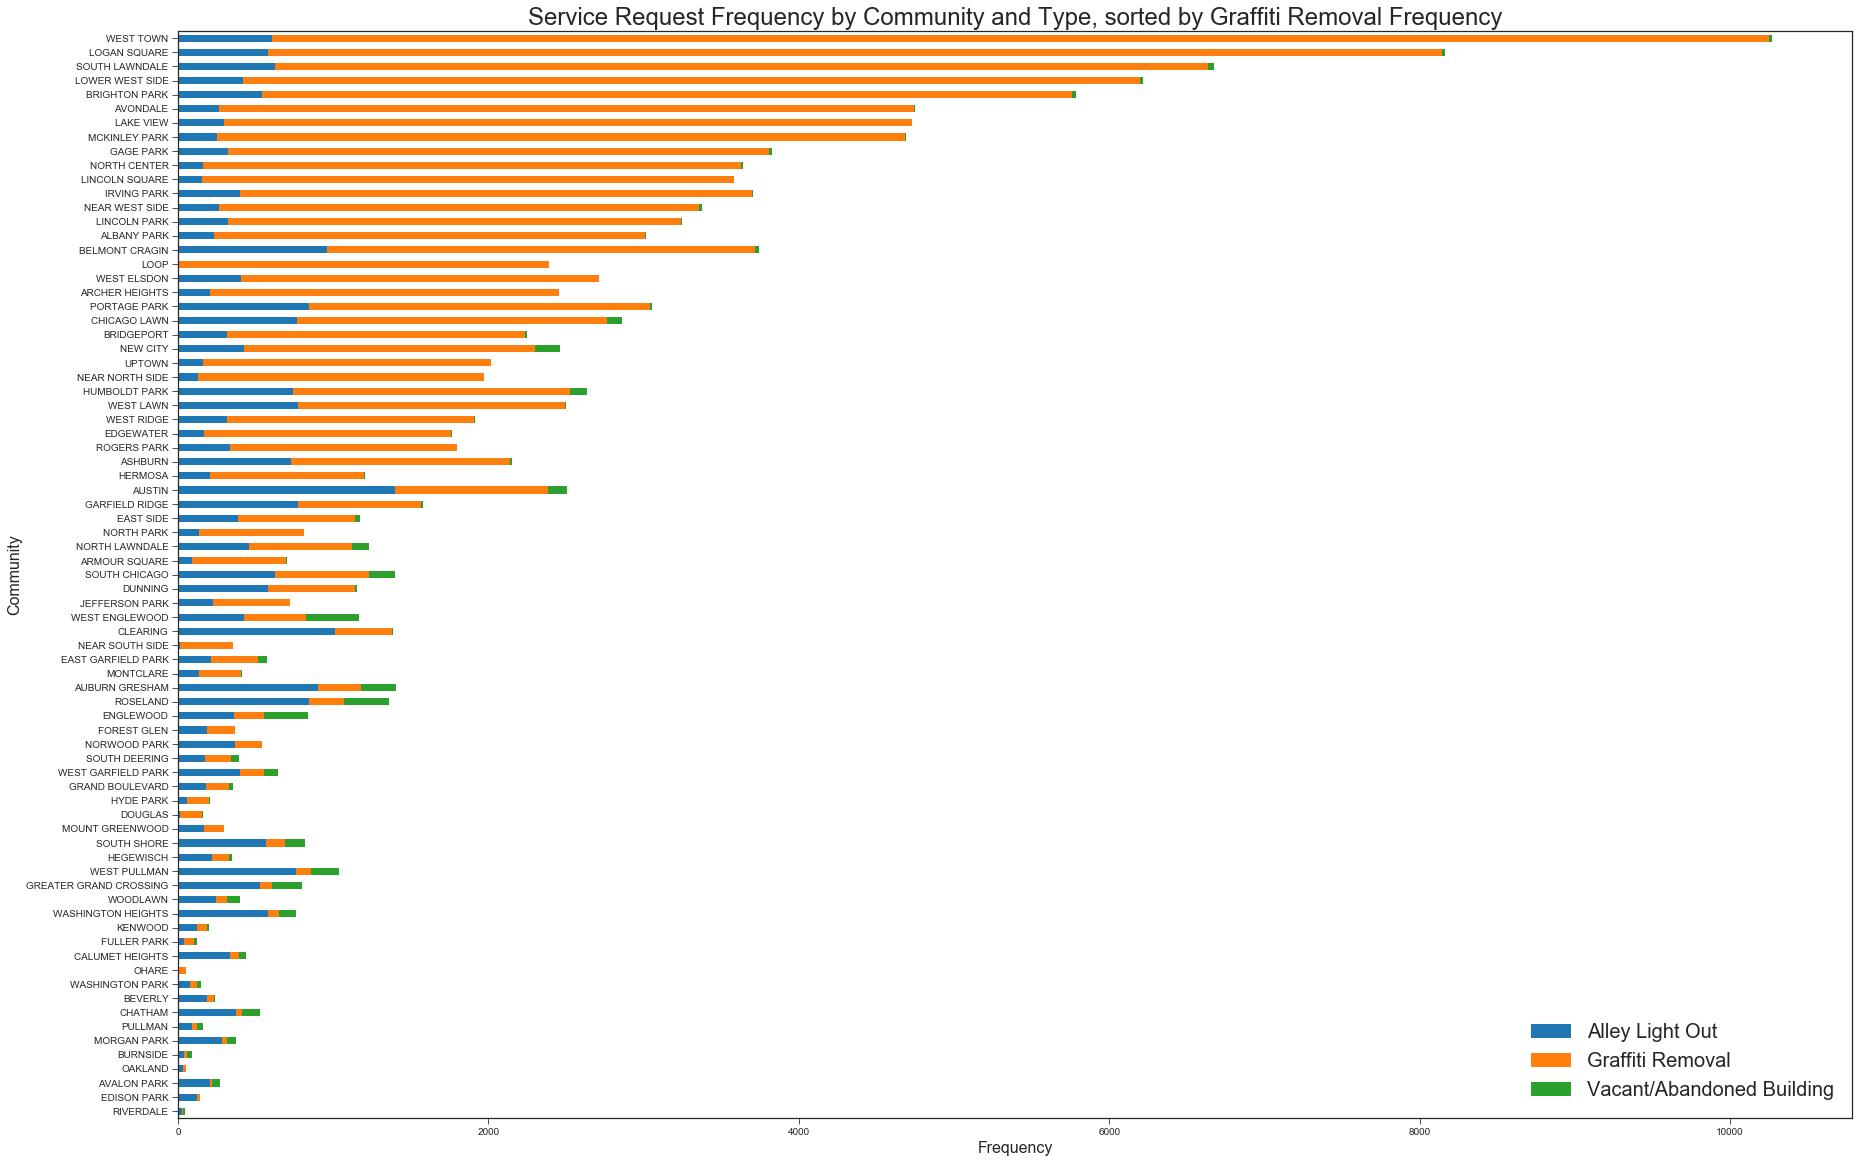

In [98]:
# Request volume by time and community
by_community = (data_collection_311.summary_statistics
                (full_df, 'type_of_service_request', 'community', np.sum).sort_values('Graffiti Removal'))
by_community.plot(figsize=(30,20), kind='barh', stacked = True)
plt.xlabel('Frequency', size = 16)
plt.ylabel('Community', size = 16)
plt.title('Service Request Frequency by Community and Type, sorted by Graffiti Removal Frequency', size=24)
plt.legend(prop={'size': 20})

### Task 3 Observations

There is huge variation in request volume across communities. We can see that West Town has the greatest number of total requests as well as the largest number of total requests for Graffiti removal. While requests regarding Vacant and Abandoned Buildings have the lowest total volume overall, request volume is high in a selection of south and west side neighborhoods, including Auburn Gresham, Roseland, Englewood, West Pullman, and North Lawndale.

It would also be useful to view these statistics as rates per 1000 persons rather than raw values. It is easy to imagine that some of the variation in request volume is due to geographic or population density in a given community. Additional information would increase our understanding of where true disparities in request volume exist, and further help us seek out underlying factors affecting those requests.

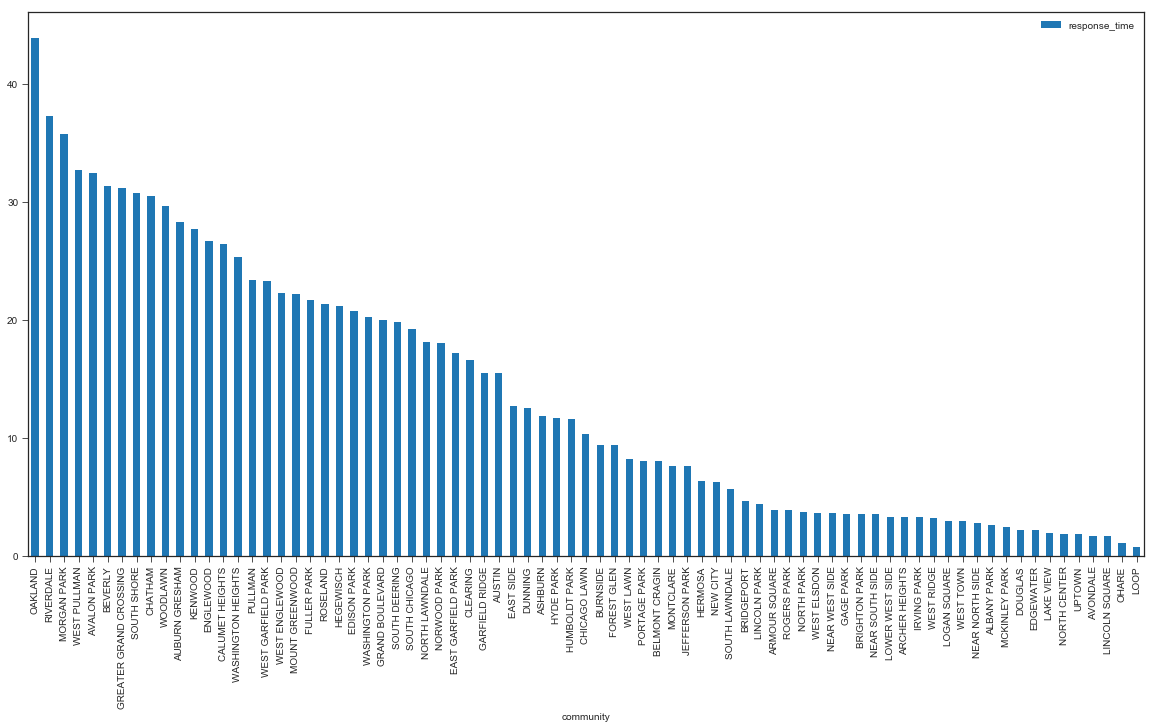

In [99]:
# Average response time by community
by_response_time = full_df[pd.notnull(full_df['response_time'])].groupby('community').mean().sort_values('response_time', ascending=False).drop(['year', 'month','request_count'], axis=1)
by_response_time.plot(figsize=(20,10), kind='bar')

In [100]:
by_response_time

,response_time
community,
OAKLAND,43.829787
RIVERDALE,37.230769
MORGAN PARK,35.706320
WEST PULLMAN,32.679831
AVALON PARK,32.422330
BEVERLY,31.305000
GREATER GRAND CROSSING,31.154286
SOUTH SHORE,30.750000
CHATHAM,30.478149


### Task 3 Observations

In addition to the huge variation in request volume across communities, there is also huge variation in response time. We can see that of the 7 communities with average response time under 2 days, 5 are northside communities, one is the O'Hare community surrounding the airport, and one is the downtown Loop area. We might guess that these areas are likely to be wealthier or visited by more people from outside of Chicago, so the city may be more invested in ensuring that requests are promptly addressed.

On the other side of the scale, 9 communities (Oakland, Riverdale, Morgan Park, West Pullman, Avalon Park, Beverly, Greated Grand Crossing, South Shore, and Chatham) have average response time by the city of over 30 days. These are all South Side communities that are likely to be have more African American residents of lower income. Oakland, for example, is approximately 92% black and was the location of the Ida B. Wells Homes.

# Problem 2

In [101]:
my_api_key = "217c49410f1af077f4d96b7d5da3612d06eae18d"
fields_of_interest = ('NAME', 'B02001_001E', 'B02001_003E', 'B25003_001E',
	'B25003_002E','B25003_003E','B19001_001E','B19001_002E','B19001_003E',
	'B19001_004E','B19001_005E','B19001_006E')
IL_state_ID = states.IL.fips
cook_county_fips_id = '031'
field_name_dict = {'B02001_001E': 'race_total', 'B02001_003E': 'black_total', 
	'B25003_001E': 'total_occupied', 'B25003_002E':'owner_occupied',
	'B25003_003E': 'renter_occupied','B19001_001E': 'total_household_income',
	'B19001_002E': '<$10k','B19001_003E': '$10k-$15k', 
	'B19001_004E': '$15k-$20k','B19001_005E':'$20k-$25k',
	'B19001_006E': '$25k-30k'}
block_shape_path = './cb_2016_17_bg_500k/cb_2016_17_bg_500k.shp'

In [102]:
census_gdf = data_collection_311.census_data_pull(my_api_key, fields_of_interest, IL_state_ID, cook_county_fips_id, field_name_dict)
census_gdf = data_collection_311.census_calcs(census_gdf)
spatial_census_gdf = data_collection_311.merge_census_shape_dfs(census_gdf, block_shape_path)
augmented_df = data_collection_311.spatial_join(full_df, spatial_census_gdf)

## Question 1

In [103]:
# Aggregation type dictionary
f = {'request_count': ['sum'], 'pct_black': ['mean'], 'pct_owner': ['mean'], 'pct_under_30k': ['mean'] }

In [104]:
# Dataframe of Vacant/Abandoned building requests, grouped by GEOID, i.e. block group
vacant_df = augmented_df[augmented_df['type_of_service_request'] == 
                         'Vacant/Abandoned Building'].groupby('GEOID').agg(f)

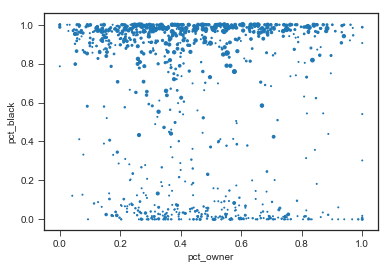

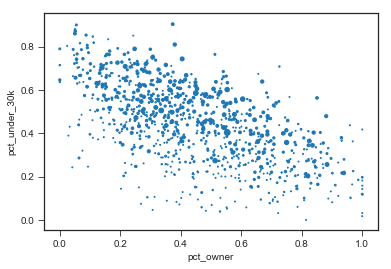

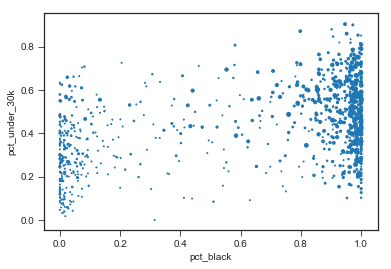

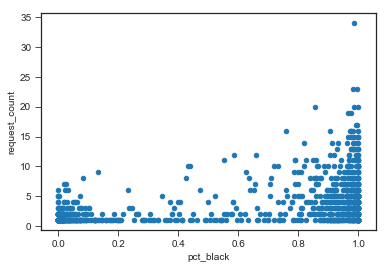

In [105]:
# Scatter plots of each combination of demographic factors, with number of requests as size of point
vacant_df.plot(x = 'pct_owner', y = 'pct_black', s = vacant_df['request_count'].values, kind='scatter')
vacant_df.plot(x = 'pct_owner', y = 'pct_under_30k',s = vacant_df['request_count'].values, kind='scatter')
vacant_df.plot(x = 'pct_black', y = 'pct_under_30k',s = vacant_df['request_count'].values, kind='scatter')

# Scatter between percent of the population that is black and request count
vacant_df.plot(x = 'pct_black', y = 'request_count', kind='scatter')

In the top three plots, number of requests is represented by the size of each point. In the first (% Owner Occupied vs % Black) and third chart (% Black vs % Households with income under 30k), it is clear the the number of requests increases with the precentage of black residents. Therefore, the 4th plot charts request volume against % black, and we can see a clear increasing relationship. 

## Question 2

In [106]:
alley_df = augmented_df[augmented_df['type_of_service_request'] == 'Alley Light Out'].groupby('GEOID').agg(f)

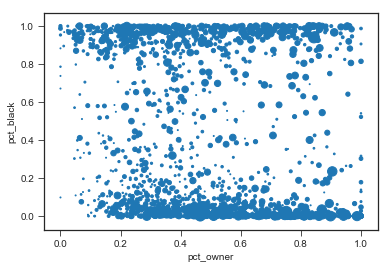

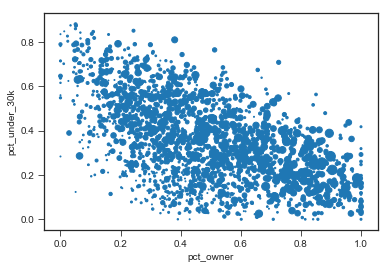

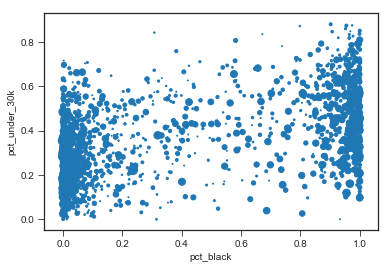

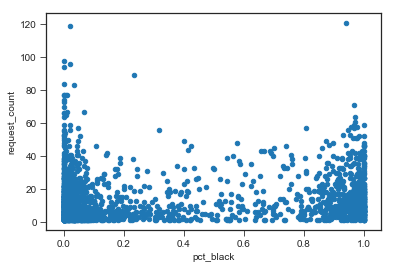

In [107]:
alley_df.plot(x = 'pct_owner', y = 'pct_black', s = alley_df['request_count'].values, kind='scatter')
alley_df.plot(x = 'pct_owner', y = 'pct_under_30k',s = alley_df['request_count'].values, kind='scatter')
alley_df.plot(x = 'pct_black', y = 'pct_under_30k',s = alley_df['request_count'].values, kind='scatter')

alley_df.plot(x = 'pct_black', y = 'request_count', kind='scatter')

In contrast to the Vacant/Abandoned Buildings analysis, no clear pattern emerges for which type of neighborhoods are more likely to make an Alley Light Out request based on these demographic factors. With further analysis, we may be able to learn that that since alley lighting is reasonably common throughout the city, the primary factor affecting these requests would be total population within a geography.

## Question 3

In [108]:
# Dataframe of Vacant/Abandoned building requests, grouped by GEOID, i.e. block group
vacant_month_df = augmented_df[augmented_df['type_of_service_request'] == 
                         'Vacant/Abandoned Building'].groupby(['month','GEOID']).agg(f)

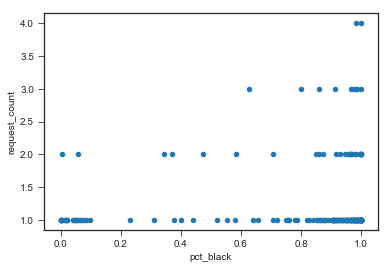

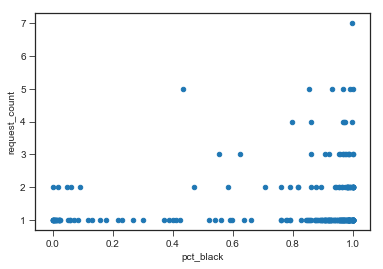

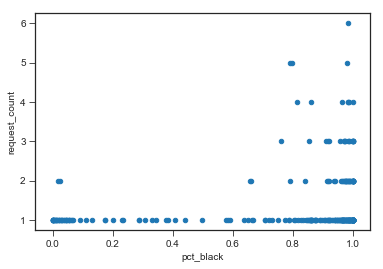

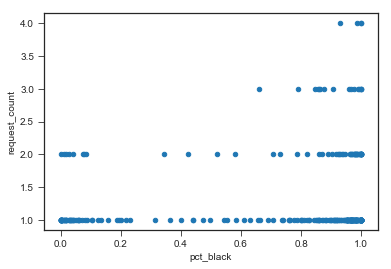

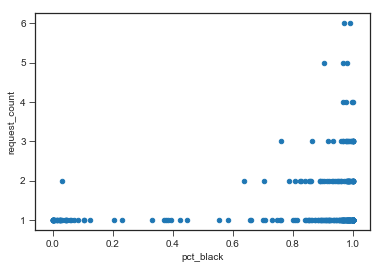

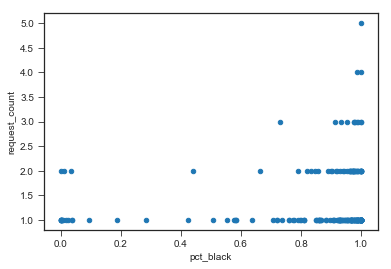

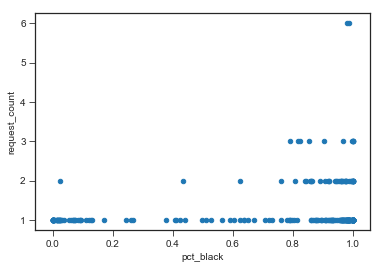

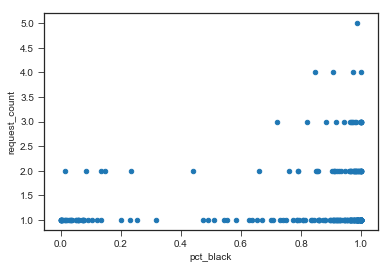

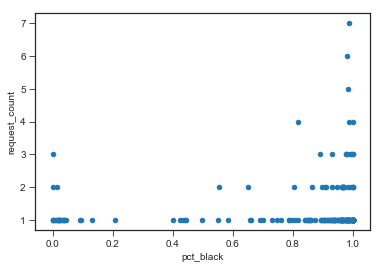

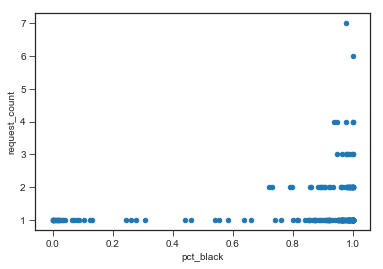

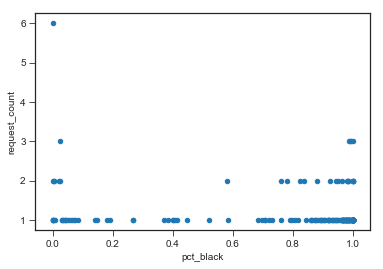

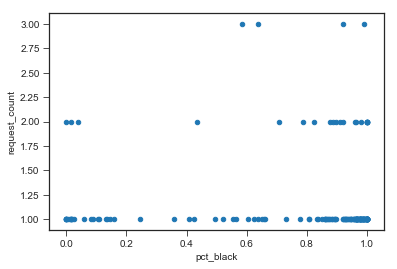

In [109]:
for i in range(1,13):
    df = augmented_df[(augmented_df['type_of_service_request'] == 'Vacant/Abandoned Building') & (augmented_df['month'] == i)].groupby('GEOID').agg(f)
    df.plot(x = 'pct_black', y = 'request_count', kind='scatter')

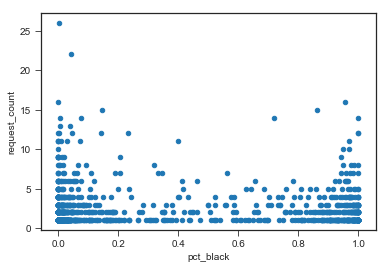

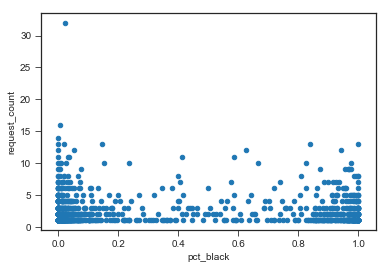

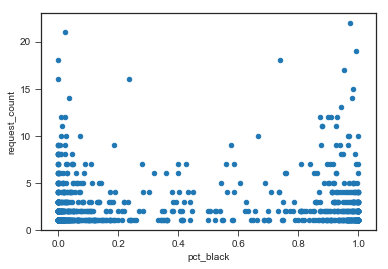

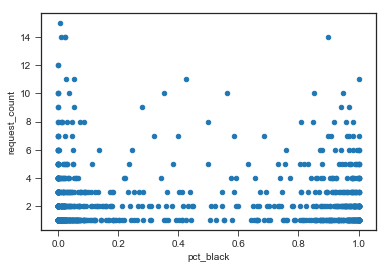

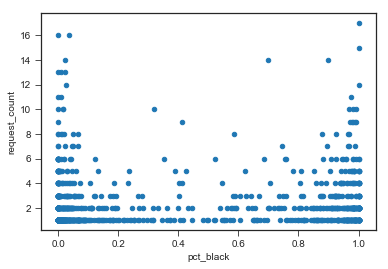

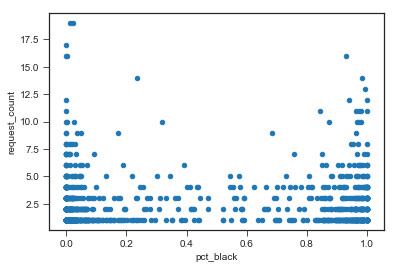

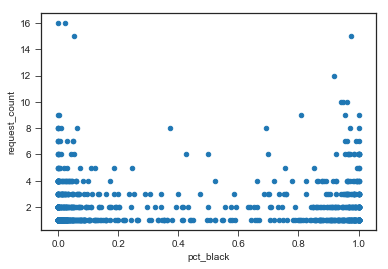

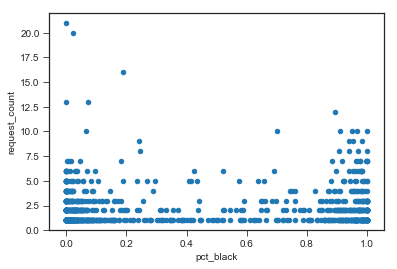

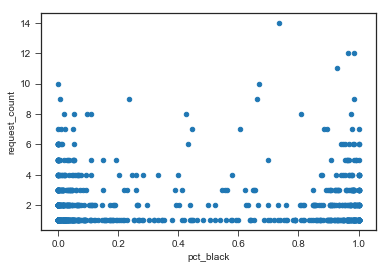

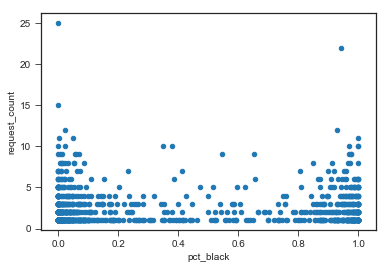

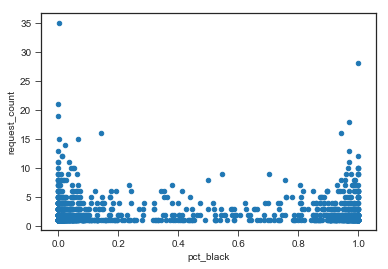

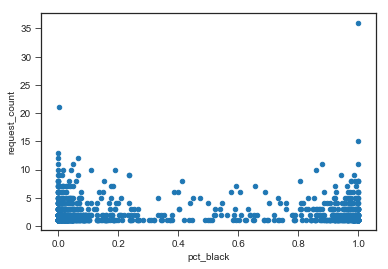

In [110]:
for i in range(1,13):
    df = augmented_df[(augmented_df['type_of_service_request'] == 'Alley Light Out') & (augmented_df['month'] == i)].groupby('GEOID').agg(f)
    df.plot(x = 'pct_black', y = 'request_count', kind='scatter')

There are in request volume over time, but there is no obvious change in the observable patterns of requests on a month to month basis.

## Question 4

I don't have time to finish this part but my first approach would be to bin both dataframes into low, medium, high categories (or additional categories as needed). Then I would find the within group averages of the demographic characteristics of interest and compare the category averages across dataframes.

# Problem 3

## Task A

In [111]:
# Note, I'm using community rather than block group because it is a smaller geographic unit
# and will therefore be more specific to this address
community_3600_roosevelt = augmented_df[augmented_df['street_address'] == '3600 W ROOSEVELT RD']['community'][0]

In [112]:
prob_df = augmented_df[augmented_df['community'] == community_3600_roosevelt].groupby('type_of_service_request').sum()
prob_df

,response_time,year,month,request_count,index_right,pct_black,pct_owner,pct_under_30k,ALAND,AWATER
type_of_service_request,,,,,,,,,,
Alley Light Out,18669.0,927820.0,2937.0,460,1337979,418.214073,101.753379,270.533512,135605152,1230402
Graffiti Removal,456.0,1327186.0,4851.0,658,1895638,534.154470,206.552553,354.964809,209987177,582822
Vacant/Abandoned Building,0.0,221870.0,737.0,110,275083,102.838460,30.127675,67.537077,28635326,32379


In [113]:
# Probability of Alley Lights Out
prob_df['request_count'].loc['Alley Light Out'] / prob_df['request_count'].sum()

0.3745928338762215

In [114]:
# Probability of Graffiti Removal
prob_df['request_count'].loc['Graffiti Removal'] / prob_df['request_count'].sum()

0.5358306188925082

In [115]:
# Probability of Vacant/Abandoned Building
prob_df['request_count'].loc['Vacant/Abandoned Building'] / prob_df['request_count'].sum()

0.08957654723127036

Given that the call came from 3600 W Roosevelt Rd, the most likely request is Graffiti Removal. The probabilities of each request type are 37.5% for Alley Light Out, 53.6% for Graffiti Removal, and 9.0% for Vacant/Abandoned Building.

## Task B

In [116]:
graffiti_community = augmented_df[augmented_df['type_of_service_request'] == 'Graffiti Removal'].groupby('community').sum()

In [117]:
# Probability from Uptown
uptown_prob = (graffiti_community['request_count'].loc['UPTOWN'] 
               / graffiti_community['request_count'].sum())
uptown_prob

0.016363458789476957

In [118]:
# Probability from combined West and East Garfield Park
garfield_prob = (graffiti_community['request_count'].loc[[
    'WEST GARFIELD PARK', 'EAST GARFIELD PARK']].sum() / graffiti_community['request_count'].sum())
garfield_prob

0.00403093341856893

In [119]:
(garfield_prob - uptown_prob)/garfield_prob

-3.0594713656387666

It is approximately 300% less likely that the complaint came from Garfield Park rather than Uptown.

## Task C

In [120]:
garfield_graffiti_calls = 100
uptown_graffiti_calls = 160
g_u_diff = garfield_graffiti_calls - uptown_graffiti_calls
g_u_diff / garfield_graffiti_calls

-0.6

In [121]:
u_g_diff = uptown_graffiti_calls - garfield_graffiti_calls
u_g_diff / uptown_graffiti_calls 

0.375

It is 60% less likely that the call came from Garfield Park as opposed to Uptown. Conversely, it is 37.5% more likely that the call came from Uptown as opposed to Garfield Park.